In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Problem statement: To classify the loan status as yes or no according to the applicant's income and other specifications

In [4]:
data=pd.read_csv('loan_sanction_train.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
Counter(data.Loan_Status)

Counter({'Y': 422, 'N': 192})

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## EDA, Data cleaning and preprocessing

In [11]:
sns.pairplot(data, hue="Gender", palette="Set1")

NameError: name 'sns' is not defined

In [12]:
data.Loan_Status=data.Loan_Status.map({"Y":1, "N":0})

In [13]:
data=data.drop("Loan_ID", axis=1)
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1


<AxesSubplot:>

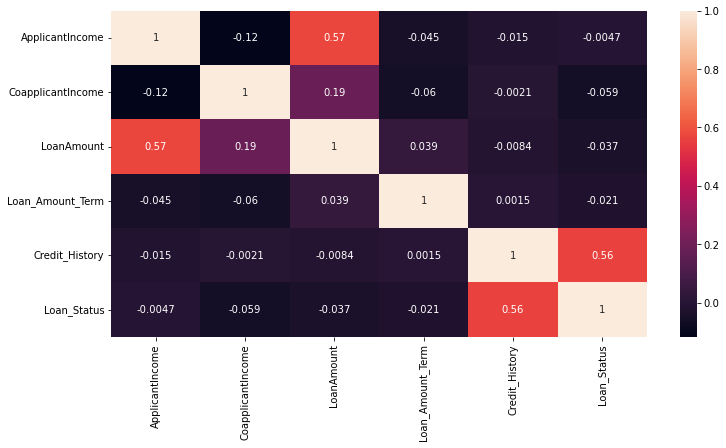

In [518]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True)

### Gender

In [14]:
Counter(data.Gender)

Counter({'Male': 489, 'Female': 112, nan: 13})

In [15]:
Counter(data.Gender)['Female']/data.shape[0]*13

2.3713355048859937

In [16]:
sns.countplot(data=data,x="Gender")

NameError: name 'sns' is not defined

In [17]:
data.Gender.fillna(value="Male", inplace=True)

In [18]:
Counter(data.Gender)

Counter({'Male': 502, 'Female': 112})

In [19]:
per_gender=data.groupby(["Gender", 'Loan_Status']).mean().reset_index()
px.bar(per_gender, x="Gender", y="LoanAmount", color="Loan_Status", text_auto='.2s')

### Married

In [20]:
Counter(data.Married)

Counter({'No': 213, 'Yes': 398, nan: 3})

In [21]:
Counter(data.Married)['No']/data.shape[0]*3

1.0407166123778502

In [22]:
data.isna().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
data[data.Married.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,1
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,1


In [24]:
data=data.dropna(subset=['Married'])

In [25]:
sns.countplot(data=data,x="Married")

NameError: name 'sns' is not defined

In [26]:
per_marital=data.groupby(["Married", 'Loan_Status']).mean().reset_index()
px.bar(per_marital, x="Married", y="LoanAmount", color="Loan_Status", text_auto='.3s')

### Dependants

In [27]:
Counter(data.Dependents)

Counter({'0': 345, '1': 102, '2': 101, '3+': 51, nan: 12})

In [28]:
data[data.Dependents.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,1
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,1
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,0
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,0
301,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,1
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,1
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,1
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,0
355,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,1
517,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,0


In [29]:
data.loc[(data['Gender'] == 'Female') & (data['Married'] == 'No'), 'Dependents']=\
data.loc[(data['Gender'] == 'Female') & (data['Married'] == 'No'), 'Dependents'].fillna("0")

In [30]:
data.loc[(data['Gender'] == 'Male') & (data['Married'] == 'No'), 'Dependents']=\
data.loc[(data['Gender'] == 'Male') & (data['Married'] == 'No'), 'Dependents'].fillna("0")

In [31]:
data.loc[(data['Gender'] == 'Male') & (data['Married'] == 'Yes')& (data['CoapplicantIncome'] == 0), 'Dependents']=\
data.loc[(data['Gender'] == 'Male') & (data['Married'] == 'Yes')& (data['CoapplicantIncome'] == 0), 'Dependents'].fillna("1")

In [32]:
data.loc[(data['Gender'] == 'Male') & (data['Married'] == 'Yes')& (data['CoapplicantIncome'] > 0), 'Dependents']=\
data.loc[(data['Gender'] == 'Male') & (data['Married'] == 'Yes')& (data['CoapplicantIncome'] > 0), 'Dependents'].fillna("0")

<AxesSubplot:xlabel='Dependents', ylabel='count'>

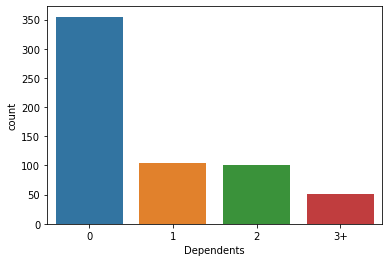

In [538]:
sns.countplot(data=data,x="Dependents")

In [33]:
per_dependency=data.groupby(["Dependents", 'Loan_Status']).mean().reset_index()
px.bar(per_dependency, x="Dependents", y="LoanAmount", color="Loan_Status", text_auto='.3s')

### Education

In [34]:
Counter(data.Education)

Counter({'Graduate': 477, 'Not Graduate': 134})

<AxesSubplot:xlabel='Education', ylabel='count'>

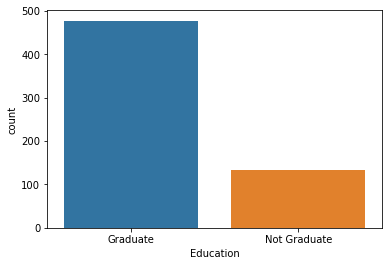

In [541]:
sns.countplot(data=data,x="Education")

In [35]:
per_education=data.groupby(["Education", 'Loan_Status']).mean().reset_index()
per_education

,Education,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Graduate,0,6114.514286,2111.028571,161.388060,350.364964,0.561538
1,Graduate,1,5747.522255,1567.032404,151.045593,342.180723,0.980645
2,Not Graduate,0,3646.442308,1249.903846,122.234043,326.448980,0.489796
3,Not Graduate,1,3860.256098,1293.439024,116.162500,335.696203,0.986111


In [36]:
px.bar(per_education, x="Education", y="LoanAmount", color="Loan_Status", text_auto='.3s')

### Self_Employed

In [37]:
Counter(data.Self_Employed)

Counter({'No': 497, 'Yes': 82, nan: 32})

In [38]:
data.Self_Employed=data.Self_Employed.fillna(value="No")

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

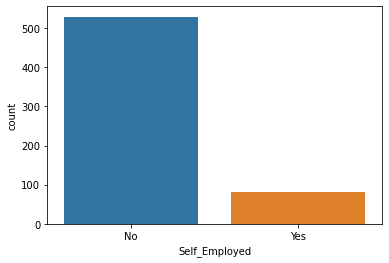

In [546]:
sns.countplot(data=data,x="Self_Employed")

In [39]:
per_self_employment=data.groupby(["Self_Employed", 'Loan_Status']).mean().reset_index()
per_self_employment

,Self_Employed,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,No,0,5346.620482,1888.439759,150.397436,346.350000,0.545455
1,No,1,4976.134986,1537.465344,138.895775,341.176471,0.978916
2,Yes,0,6081.076923,1809.923077,156.360000,330.000000,0.520000
3,Yes,1,7984.267857,1358.071429,179.240741,339.333333,1.000000


In [40]:
px.bar(per_self_employment, x="Self_Employed", y="LoanAmount", color="Loan_Status", text_auto='.3s')

### Credit History

In [41]:
data.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
data.Credit_History.value_counts()

1.0    472
0.0     89
Name: Credit_History, dtype: int64

In [43]:
data.Credit_History=data.Credit_History.fillna(0)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

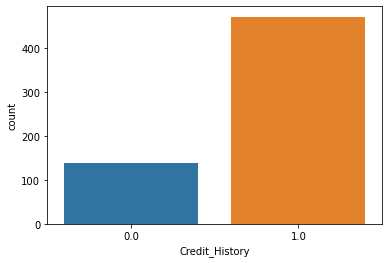

In [552]:
sns.countplot(data=data, x="Credit_History")

In [44]:
per_history=data.groupby(["Credit_History", 'Loan_Status']).mean().reset_index()
per_history

,Credit_History,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.0,0,5274.694737,1971.094737,146.788889,345.168539
1,0.0,1,5432.454545,1869.818182,162.568182,333.545455
2,1.0,0,5613.927835,1786.443299,155.604396,343.051546
3,1.0,1,5371.808000,1471.679787,142.010959,341.820163


In [45]:
px.bar(per_history, x="Credit_History", y="LoanAmount", color="Loan_Status", text_auto='.2s')

### Property Area

In [46]:
Counter(data.Property_Area)

Counter({'Urban': 201, 'Rural': 179, 'Semiurban': 231})

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

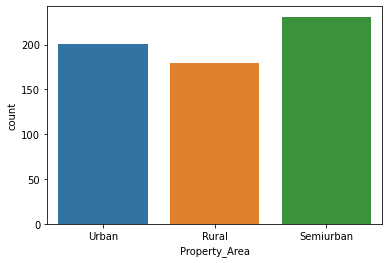

In [556]:
sns.countplot(data=data, x="Property_Area")

In [47]:
per_area=data.groupby(["Property_Area", 'Loan_Status']).mean().reset_index()
per_area

,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Rural,0,6497.521739,1436.507246,158.742424,345.134328,0.565217
1,Rural,1,4962.290909,1776.655636,148.261682,345.777778,0.890909
2,Semiurban,0,5296.851852,1563.203704,154.566038,345.509434,0.425926
3,Semiurban,1,5267.016949,1524.169492,142.672414,347.451429,0.915254
4,Urban,0,4511.420290,2565.318841,140.354839,341.818182,0.507246
5,Urban,1,5873.803030,1279.862121,142.953125,327.937500,0.871212


In [48]:
px.bar(per_area, x="Property_Area", y="LoanAmount", color="Loan_Status", text_auto='.3s')

### Income

In [49]:
data.ApplicantIncome=data.ApplicantIncome.astype("float")
data.select_dtypes("float64")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [50]:
data["Total_Income"]=data.ApplicantIncome+data.CoapplicantIncome
data=data.drop(["ApplicantIncome", "CoapplicantIncome"], axis=1)

In [561]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,1,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,1,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,1,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,1,7583.0


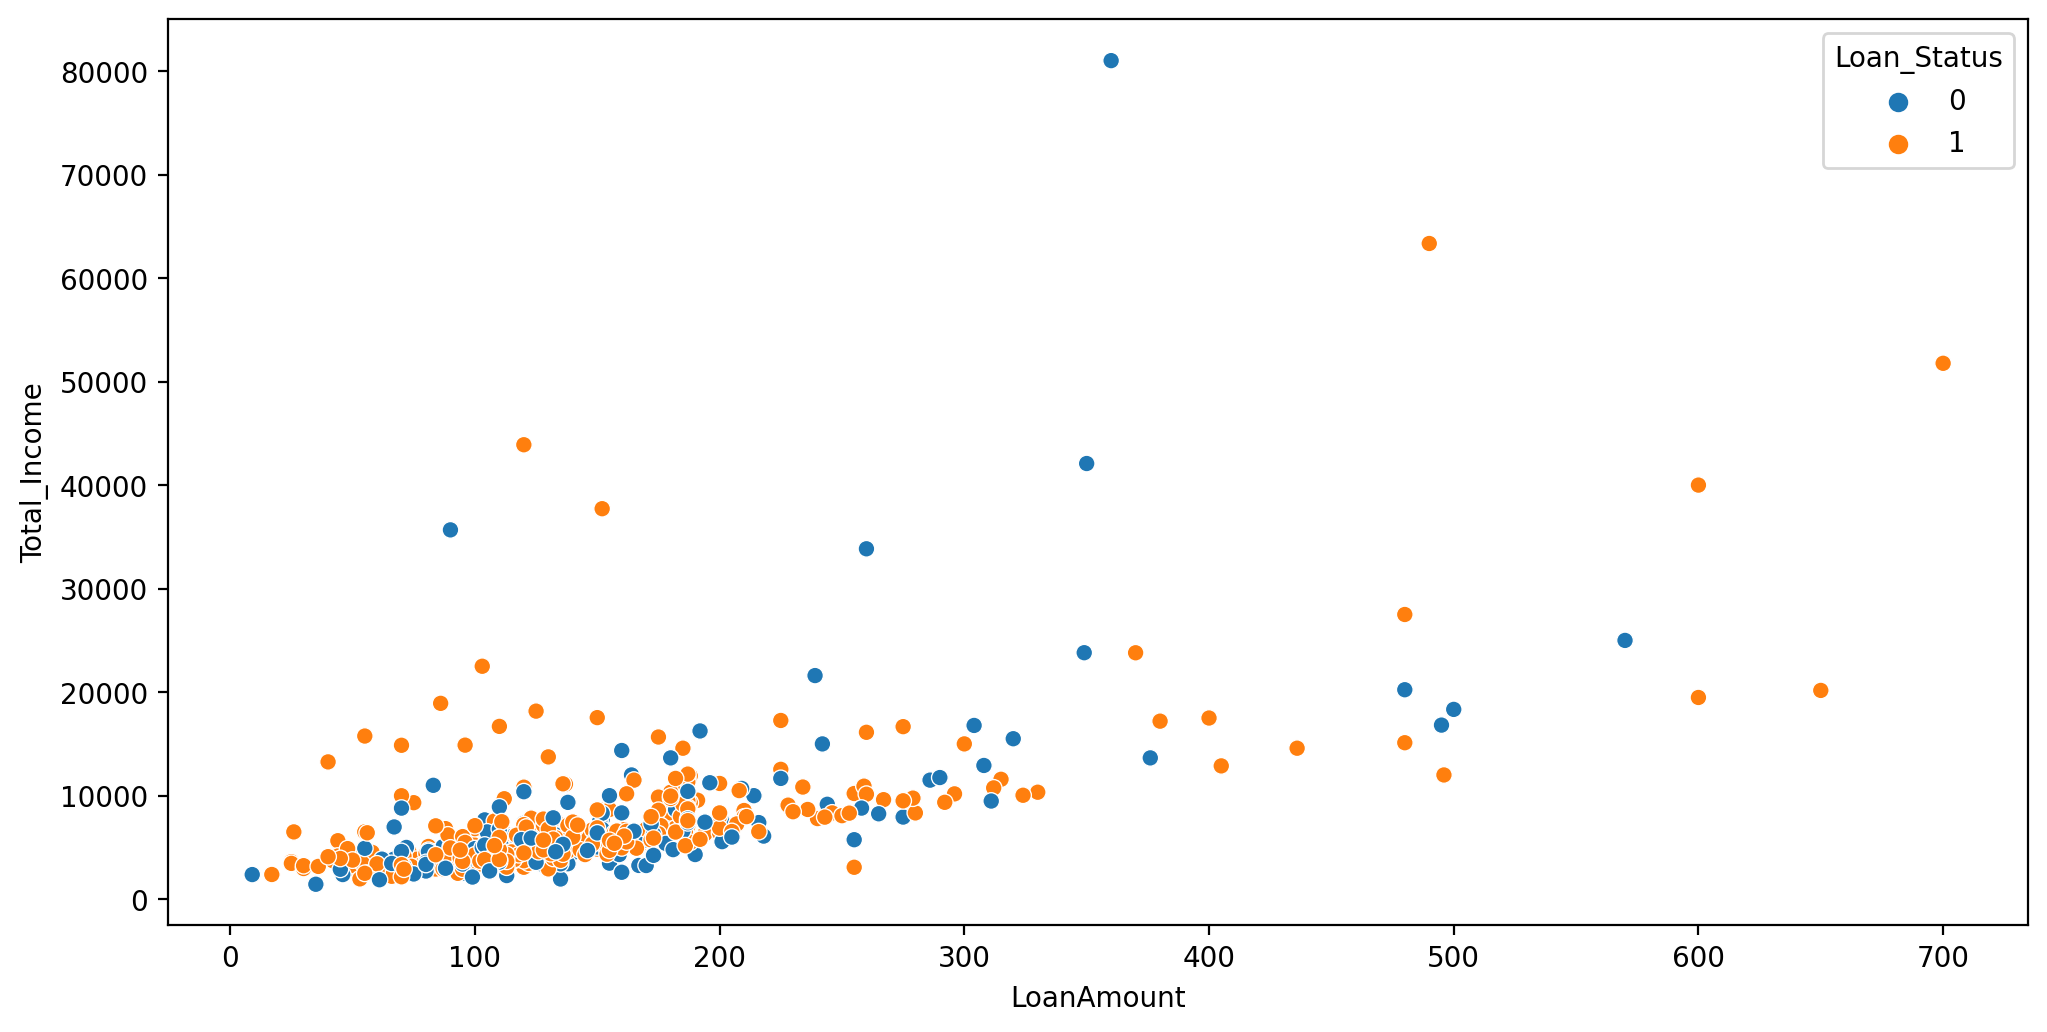

In [562]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=data, x="LoanAmount", y=data.Total_Income, hue="Loan_Status")
plt.show()

In [51]:
data.corr()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
LoanAmount,1.000000,0.039071,-0.035444,-0.037678,0.624968
Loan_Amount_Term,0.039071,1.000000,0.004840,-0.022356,-0.067753
Credit_History,-0.035444,0.004840,1.000000,0.431617,-0.019820
Loan_Status,-0.037678,-0.022356,0.431617,1.000000,-0.031027
Total_Income,0.624968,-0.067753,-0.019820,-0.031027,1.000000


<AxesSubplot:xlabel='Total_Income', ylabel='Count'>

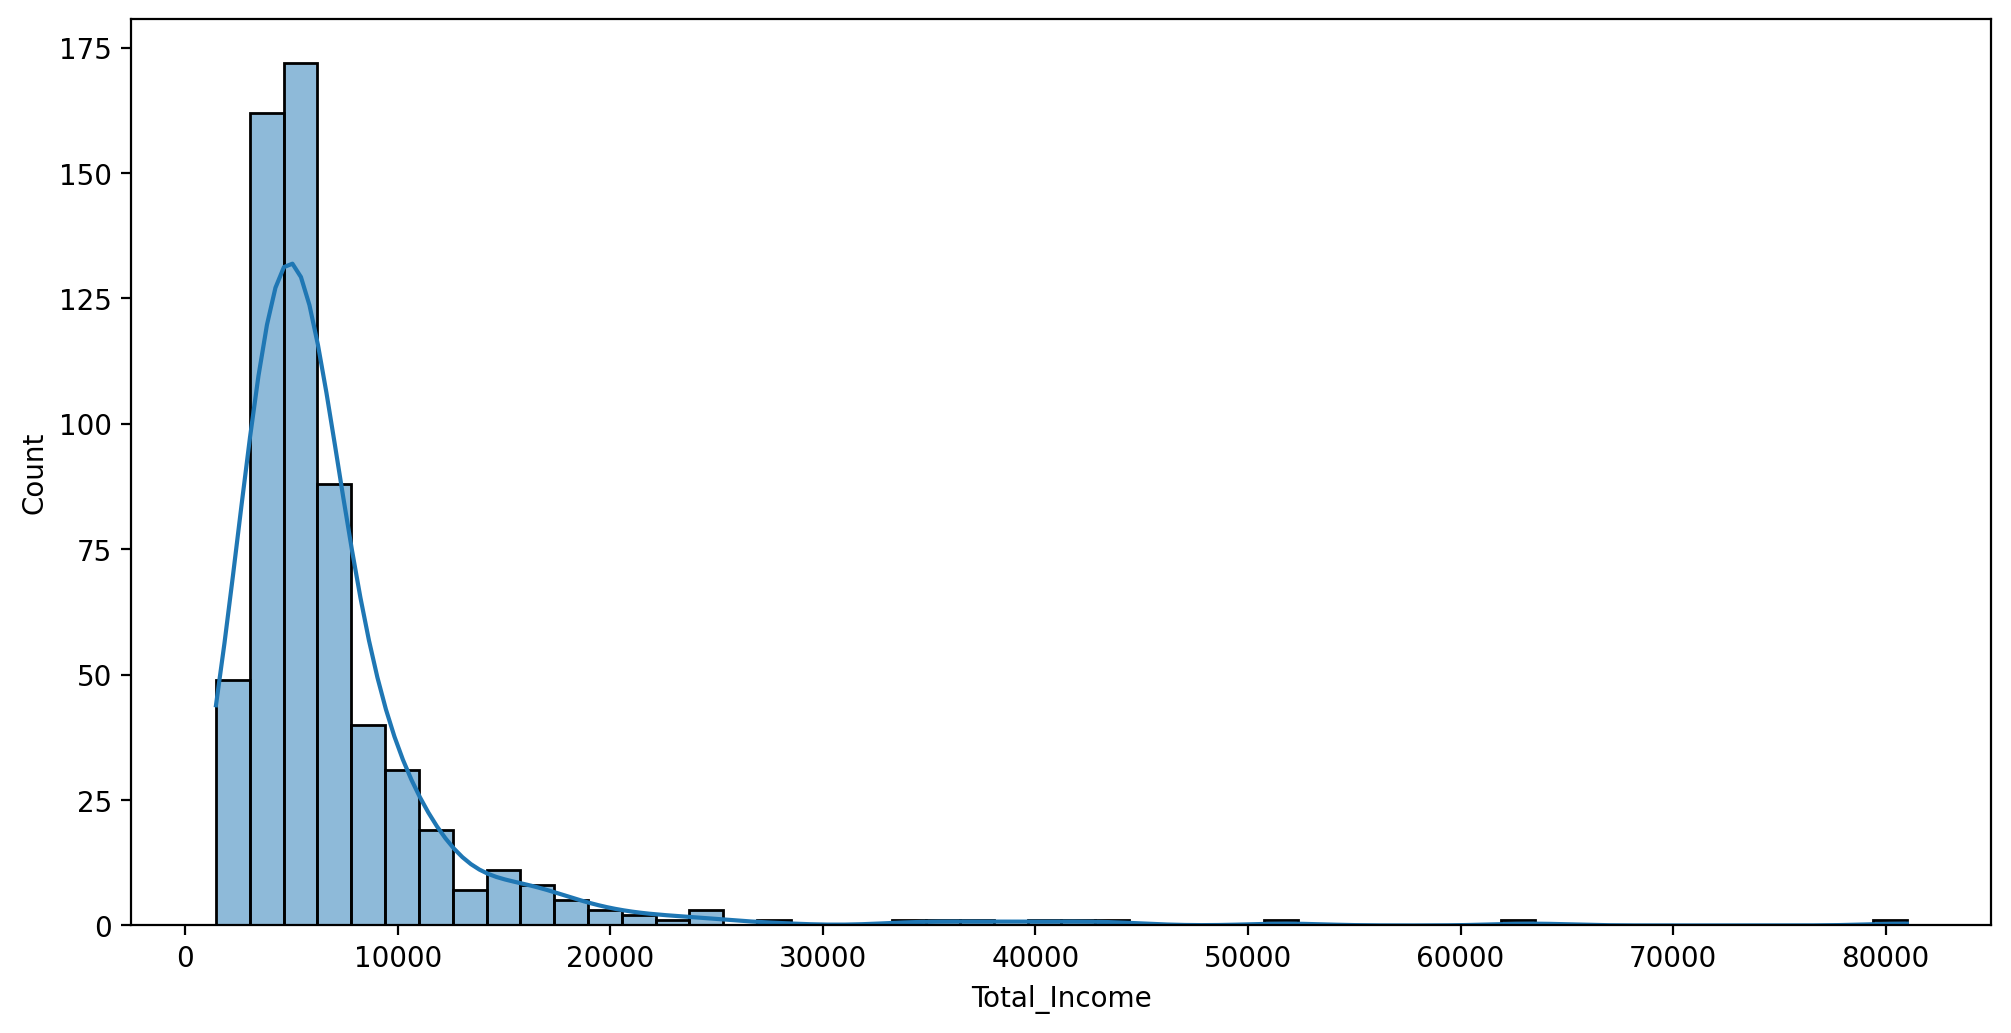

In [564]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data.Total_Income, kde=True, bins=50)

### Loan amount

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

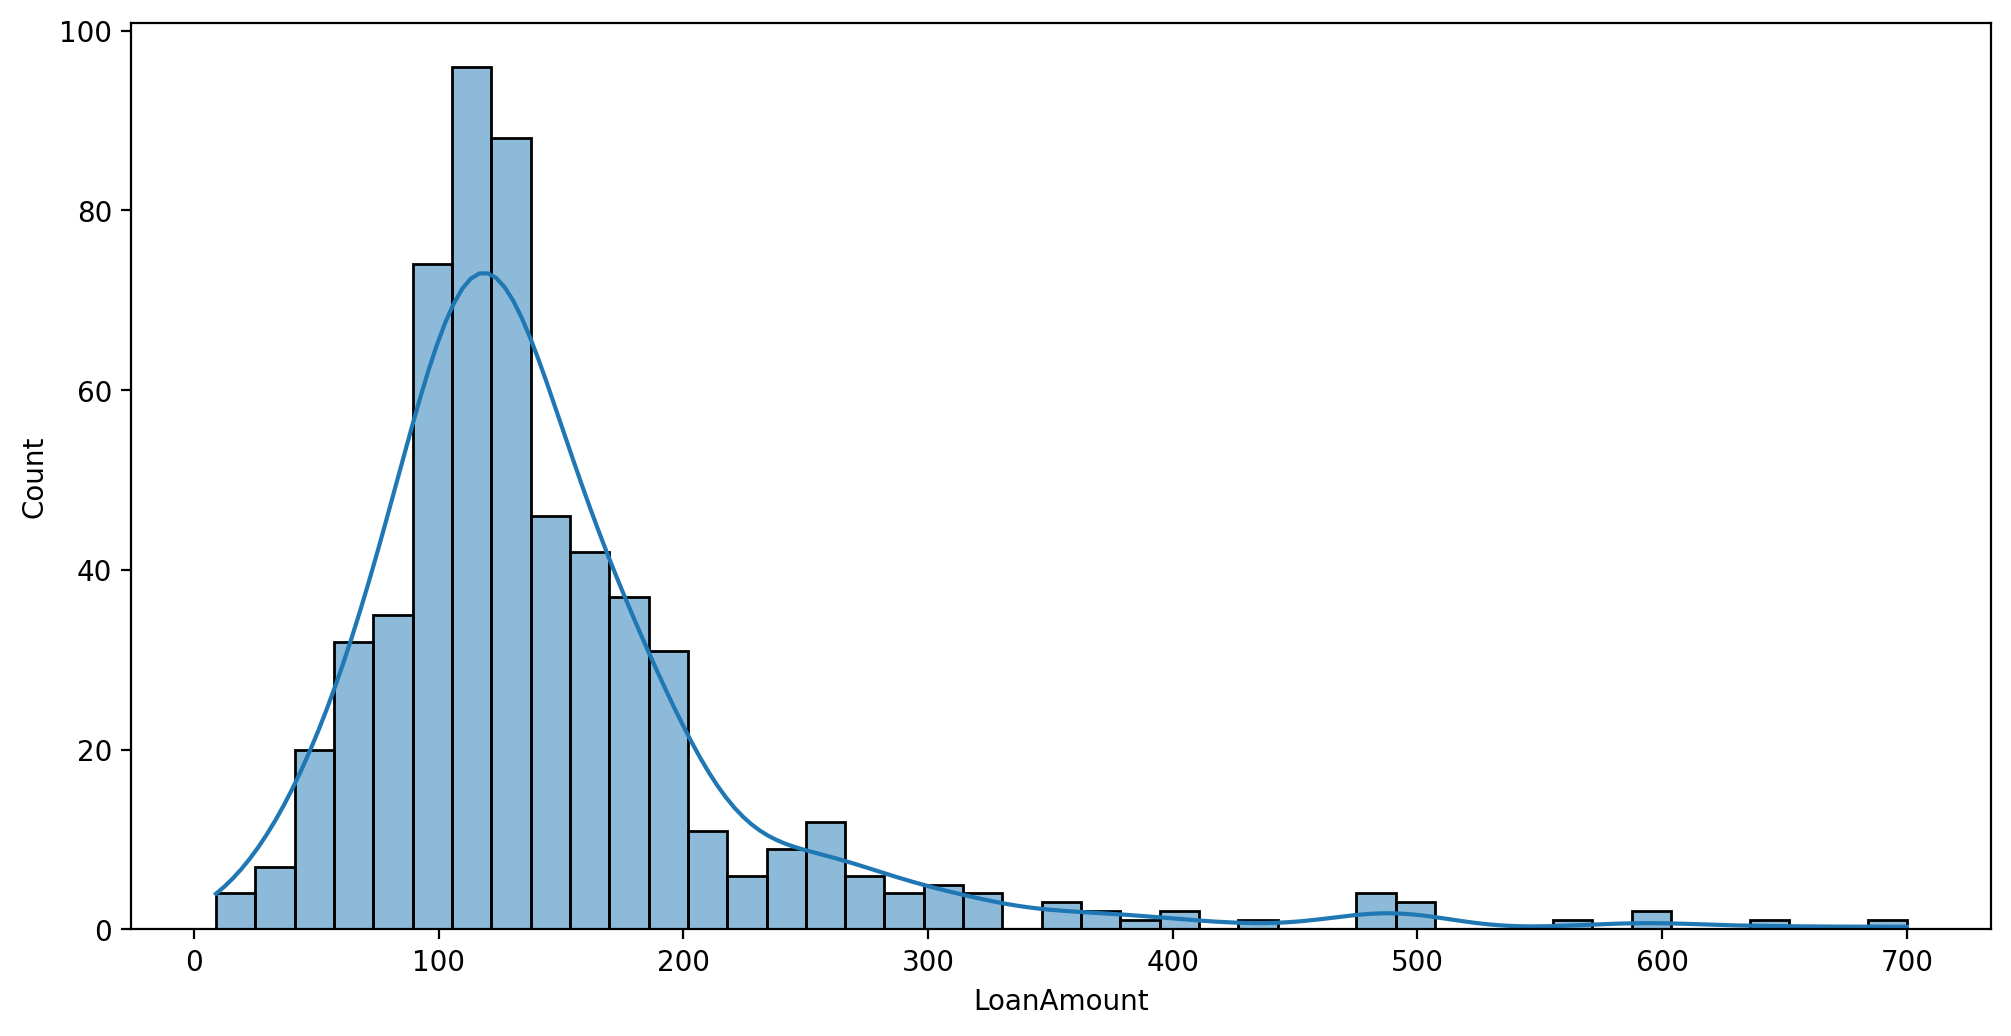

In [565]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data.LoanAmount, kde=True)

In [52]:
data[data.LoanAmount.isna()]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,1,5849.0
35,Male,Yes,0,Graduate,No,NaN,360.0,1.0,Urban,1,4342.0
63,Male,Yes,1,Graduate,No,NaN,360.0,0.0,Rural,0,4945.0
81,Male,Yes,1,Graduate,Yes,NaN,360.0,1.0,Semiurban,1,2395.0
95,Male,No,0,Graduate,No,NaN,360.0,0.0,Urban,0,6782.0
102,Male,Yes,1,Graduate,No,NaN,360.0,1.0,Urban,1,13650.0
103,Male,Yes,0,Graduate,No,NaN,360.0,1.0,Semiurban,1,8235.0
113,Female,No,1,Graduate,Yes,NaN,360.0,1.0,Semiurban,1,7451.0
127,Male,No,0,Graduate,No,NaN,360.0,1.0,Rural,1,5505.0
202,Male,Yes,3+,Not Graduate,No,NaN,180.0,1.0,Urban,0,3992.0


#### Using linear regression between loan amount and total income to fill nan values in loan amount variable

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
df_sub=data[["LoanAmount", "Total_Income"]]
df_missing = df_sub[df_sub.LoanAmount.isnull()]
df_non_missing = df_sub[df_sub.LoanAmount.notnull()]

In [55]:
lr_model=LinearRegression()
lr_model.fit(np.array(df_non_missing.Total_Income).reshape(-1,1), df_non_missing.LoanAmount)
data.LoanAmount[data.LoanAmount.isna()]=lr_model.predict(np.array(df_missing.Total_Income).reshape(-1,1))

C:\Users\Emil.Javadli\AppData\Local\Temp\ipykernel_9728\2973293828.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

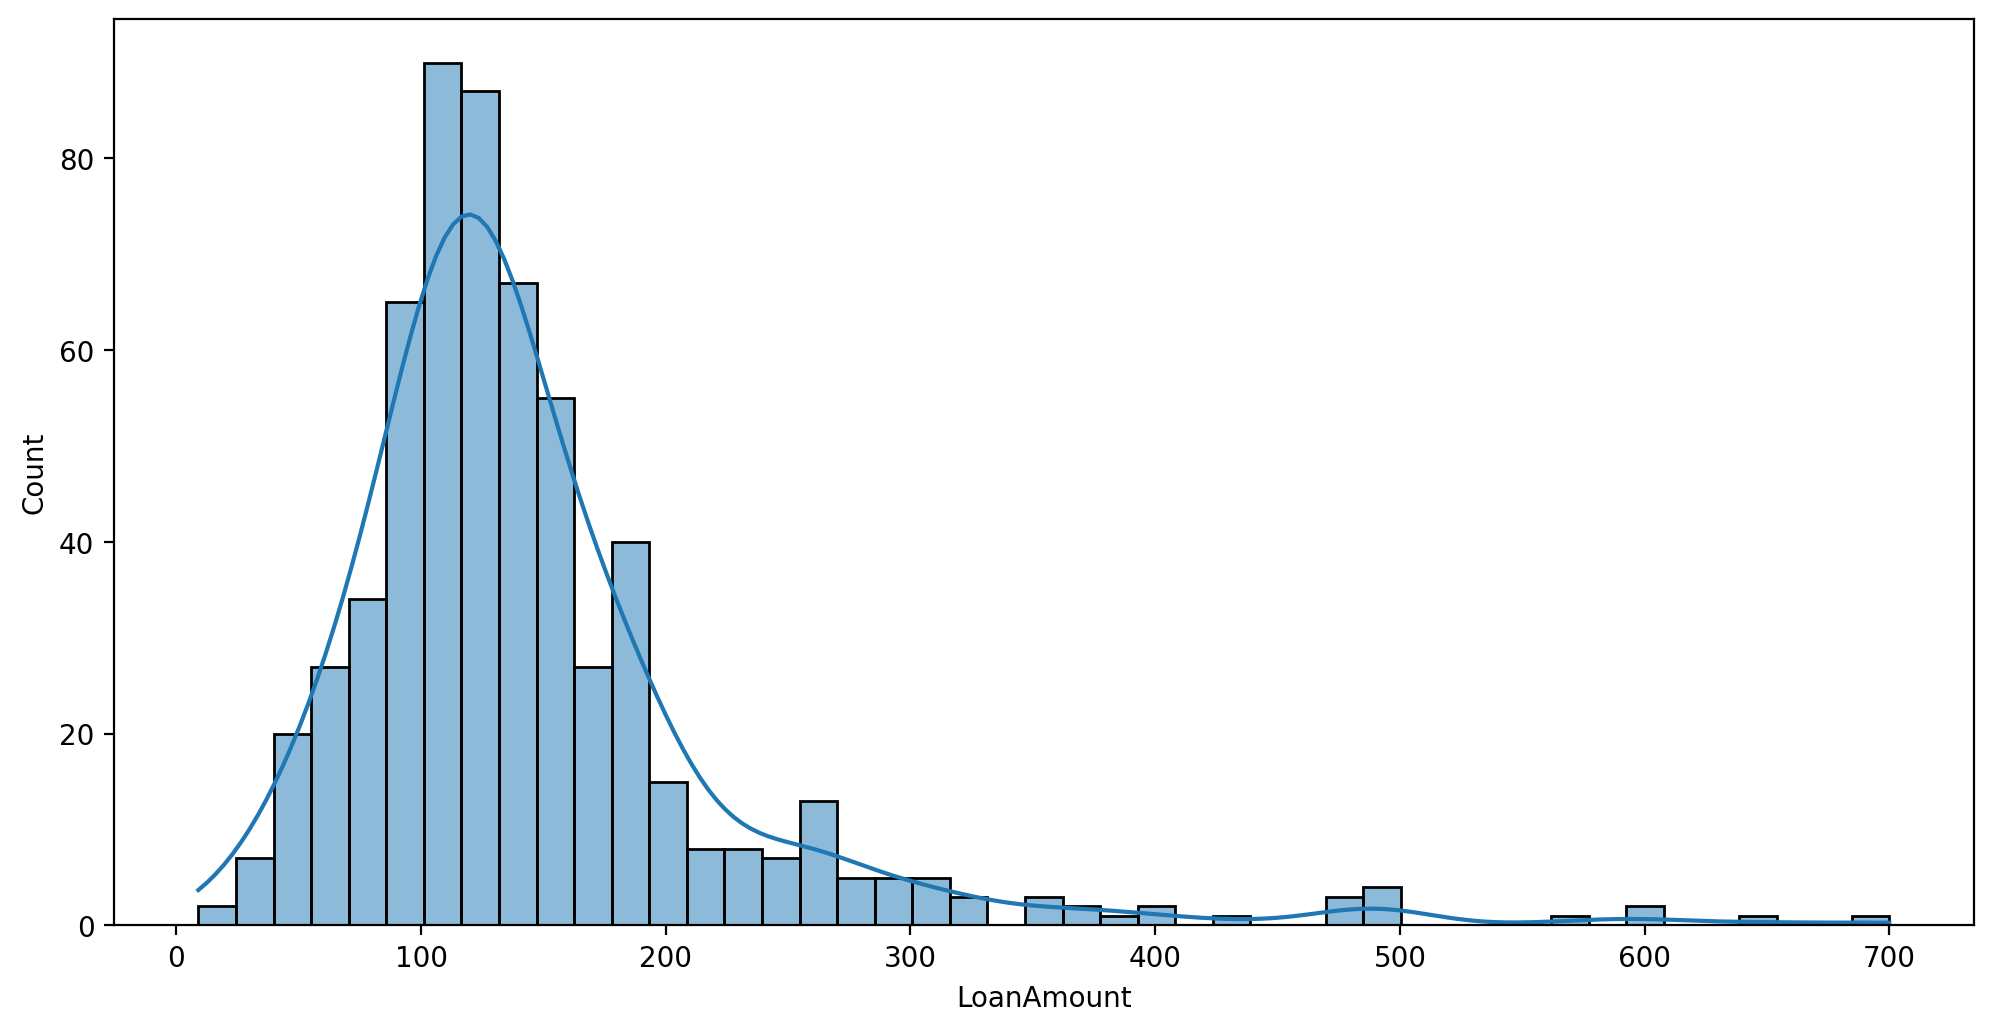

In [570]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data.LoanAmount, kde=True)

### Loan Term

In [56]:
data.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [57]:
data[data.Loan_Amount_Term.isna()]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
19,Male,Yes,0,Graduate,No,115.0,NaN,1.0,Urban,1,6100.0
36,Male,Yes,0,Graduate,No,100.0,NaN,0.0,Urban,0,3158.0
44,Male,Yes,0,Not Graduate,Yes,96.0,NaN,1.0,Urban,1,4695.0
45,Female,No,0,Graduate,No,88.0,NaN,1.0,Urban,1,3410.0
73,Male,Yes,3+,Not Graduate,No,95.0,NaN,0.0,Semiurban,0,4755.0
112,Male,Yes,0,Not Graduate,No,152.0,NaN,0.0,Rural,0,7686.0
165,Male,Yes,0,Graduate,No,182.0,NaN,1.0,Rural,1,6873.0
197,Female,No,0,Not Graduate,No,120.0,NaN,1.0,Urban,1,4272.0
223,Male,Yes,0,Graduate,No,175.0,NaN,1.0,Semiurban,1,8588.0
232,Male,No,0,Not Graduate,No,120.0,NaN,1.0,Rural,1,5787.0


In [58]:
data.Loan_Amount_Term.median()

360.0

In [59]:
data.Loan_Amount_Term.fillna(value=data.Loan_Amount_Term.median(), inplace=True)

In [60]:
data.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income        0
dtype: int64

<Figure size 2400x1200 with 0 Axes>

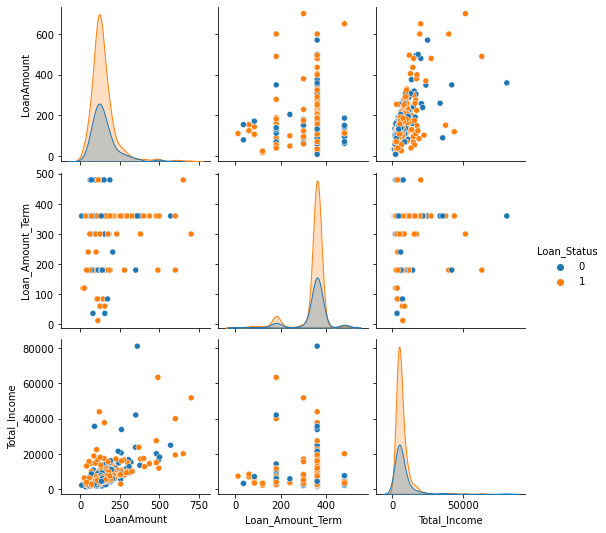

In [576]:
plt.figure(figsize=(12,6), dpi=200)
sns.pairplot(data=data.drop("Credit_History",axis=1), hue="Loan_Status")

In [61]:
data=pd.get_dummies(data, drop_first=True)
data

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,136.489051,360.0,1.0,1,5849.0,1,0,0,0,0,0,0,0,1
1,128.000000,360.0,1.0,0,6091.0,1,1,1,0,0,0,0,0,0
2,66.000000,360.0,1.0,1,3000.0,1,1,0,0,0,0,1,0,1
3,120.000000,360.0,1.0,1,4941.0,1,1,0,0,0,1,0,0,1
4,141.000000,360.0,1.0,1,6000.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.000000,360.0,1.0,1,2900.0,0,0,0,0,0,0,0,0,0
610,40.000000,180.0,1.0,1,4106.0,1,1,0,0,1,0,0,0,0
611,253.000000,360.0,1.0,1,8312.0,1,1,1,0,0,0,0,0,1
612,187.000000,360.0,1.0,1,7583.0,1,1,0,1,0,0,0,0,1


### Using DBSCAN to identify the outliers and exclude them from dataset 

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data.drop("Loan_Status", axis=1))

In [66]:
scaled_data=pd.DataFrame(scaled_data, columns=data.drop("Loan_Status", axis=1).columns, index=data.index)
scaled_data.shape

(611, 13)

In [67]:
eps_values=[]
outliers=[]
for eps in np.linspace(0.001, 10, 50):
    dbs=DBSCAN(eps=eps, min_samples=13)
    dbs.fit(scaled_data)
    outlier=np.sum(dbs.labels_==-1)
    outliers.append(outlier)
    eps_values.append(eps)

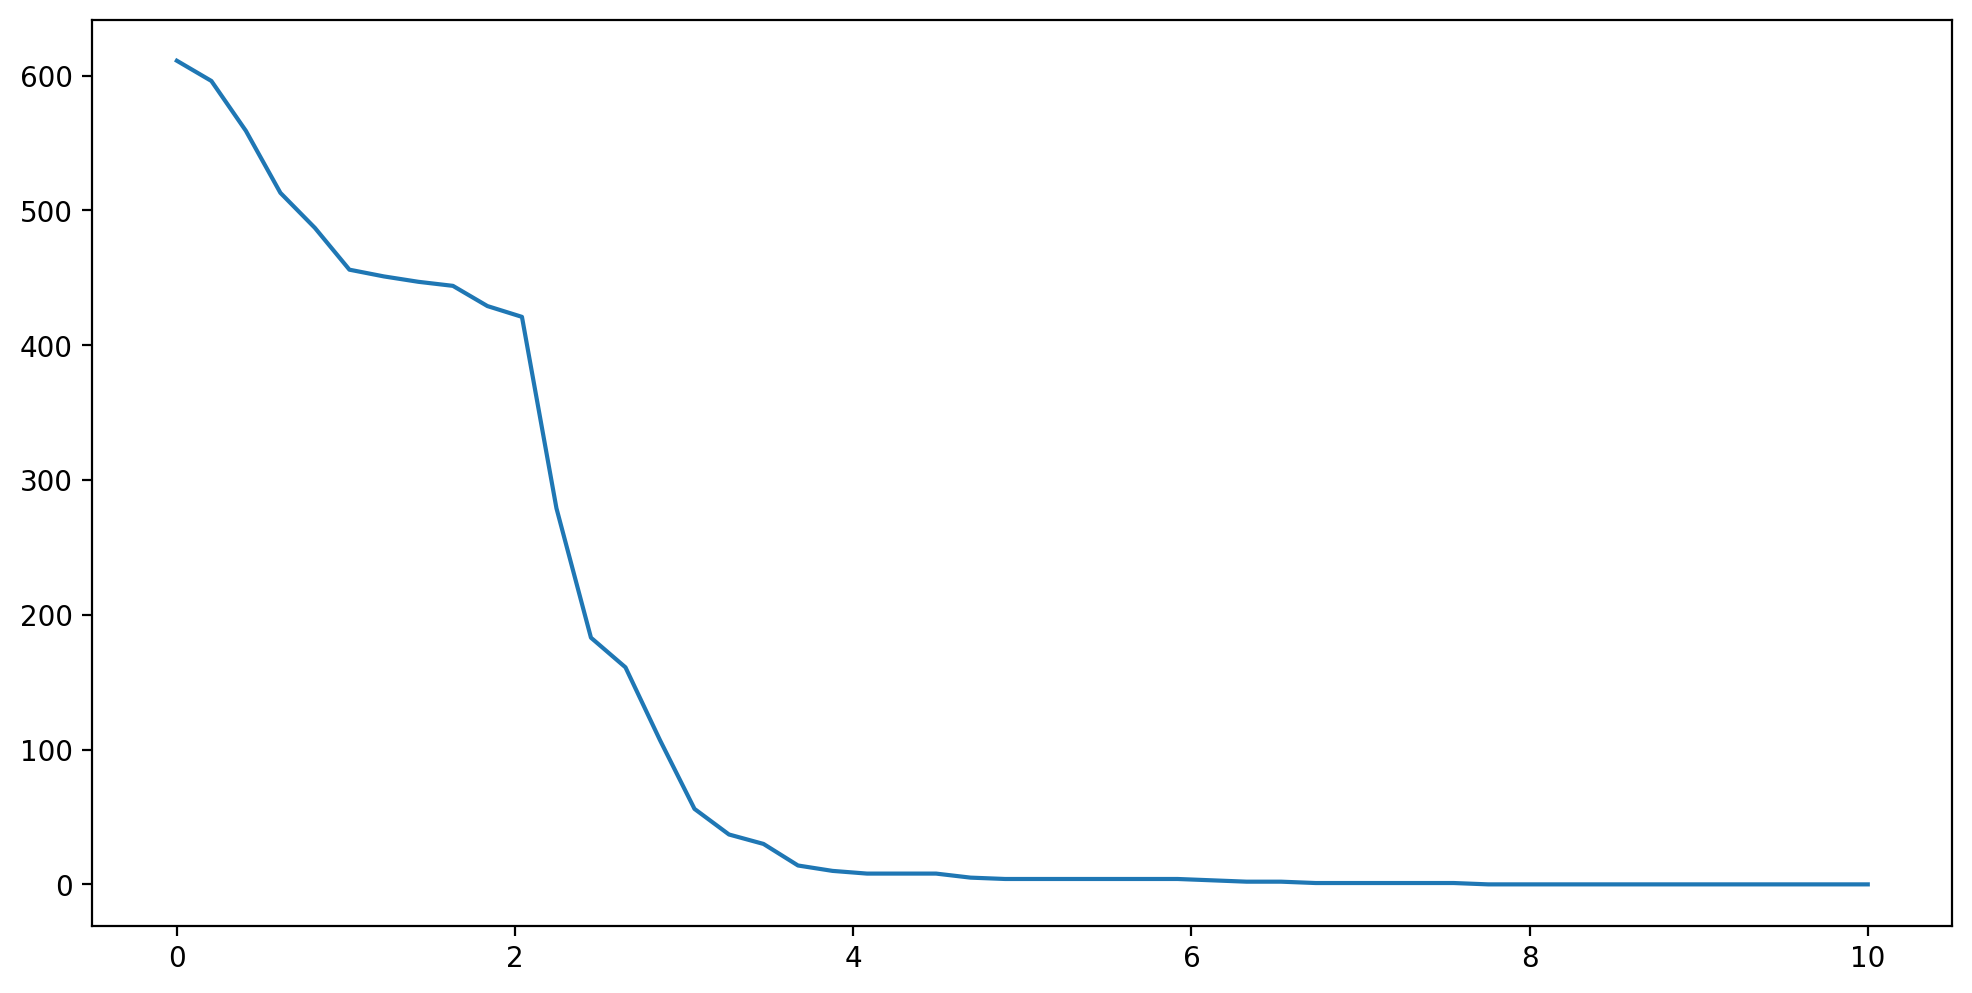

In [584]:
plt.figure(figsize=(12,6), dpi=200)
plt.plot(eps_values, outliers)

In [68]:
dbs=DBSCAN(eps=2.9, min_samples=10)
dbs.fit(scaled_data)

DBSCAN(eps=2.9, min_samples=10)

In [69]:
len(dbs.labels_[dbs.labels_==-1])

68

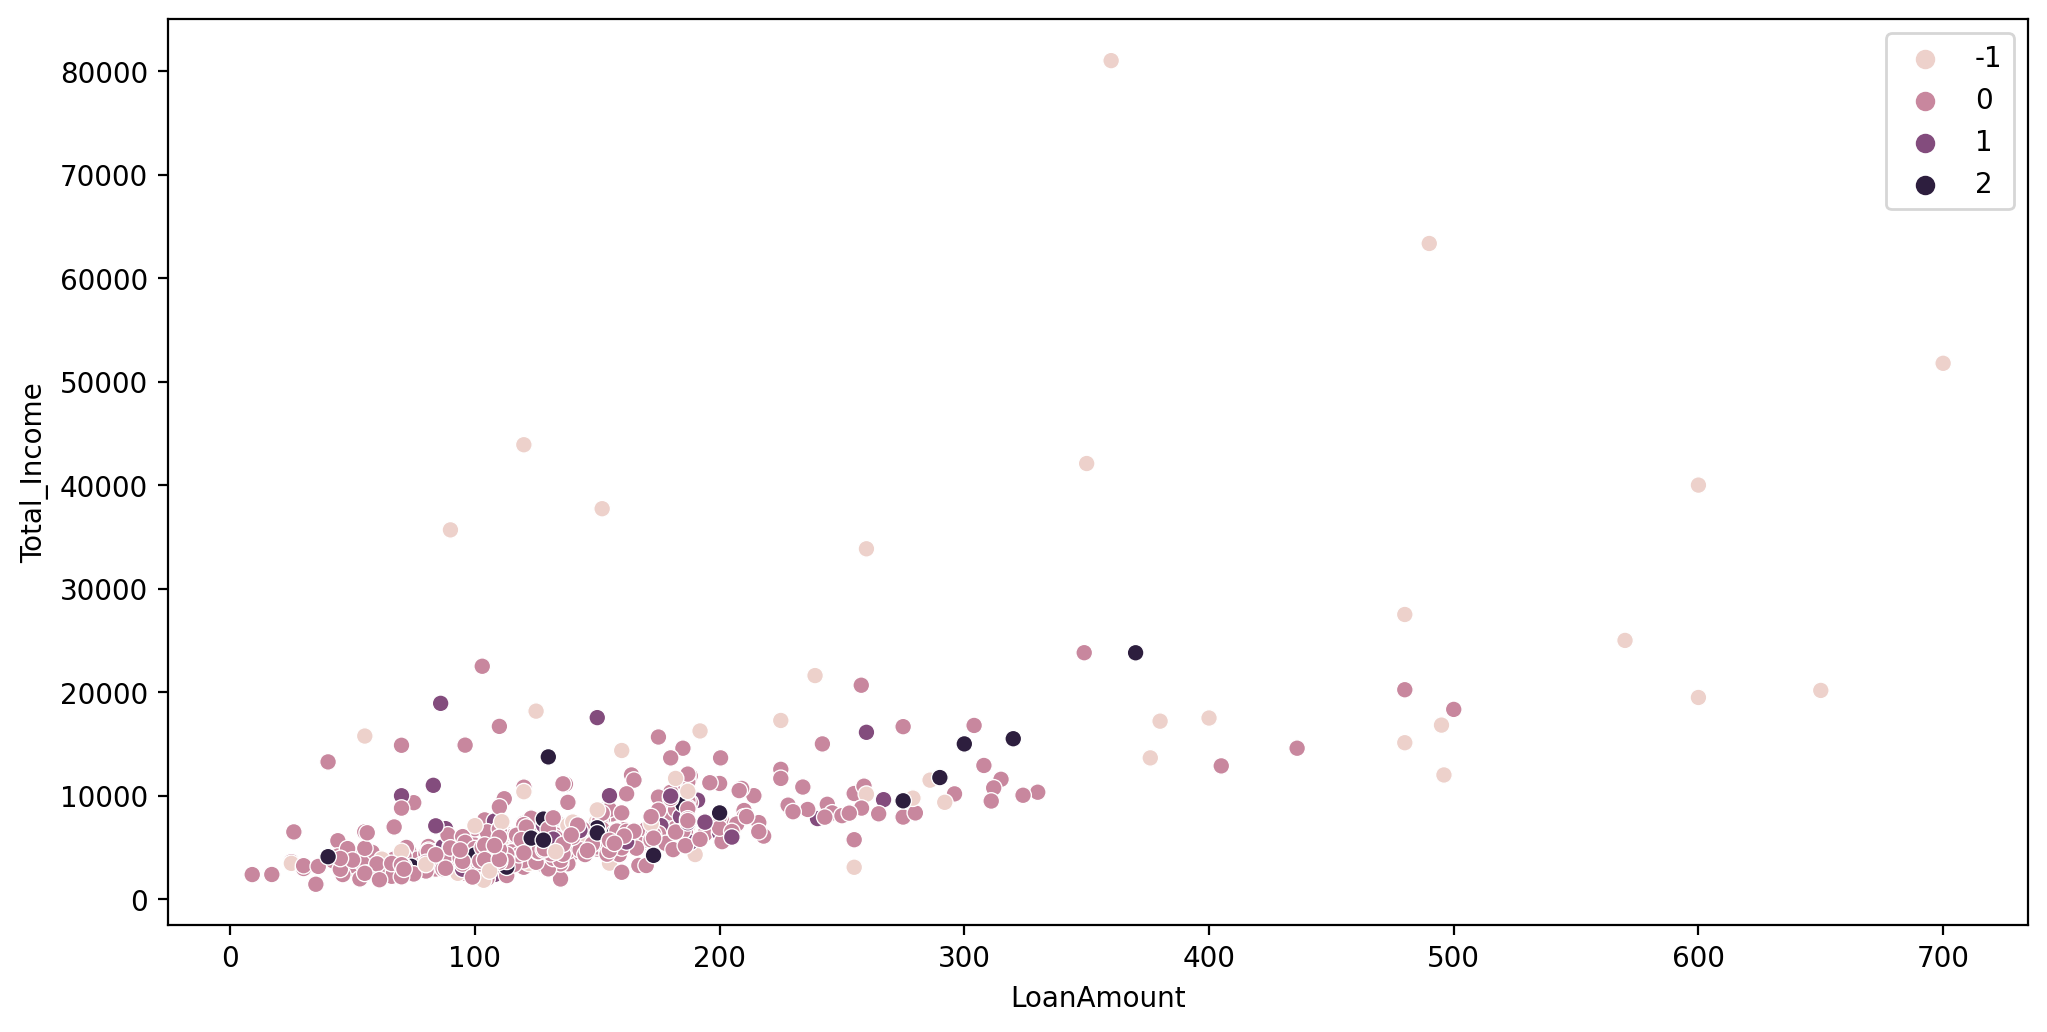

In [587]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=data, x="LoanAmount", y=data.Total_Income, hue=dbs.labels_)
plt.show()

In [70]:
outlier_indices=np.where(dbs.labels_==-1)[0]
outlier_indices

array([ 16,  54,  62,  66,  68,  71,  74,  79, 112, 127, 129, 132, 154,
       170, 171, 176, 182, 184, 201, 212, 225, 235, 243, 251, 252, 253,
       260, 278, 311, 323, 331, 332, 336, 351, 367, 368, 370, 371, 407,
       408, 415, 428, 435, 436, 440, 446, 463, 468, 470, 490, 492, 494,
       503, 519, 520, 522, 531, 537, 543, 554, 558, 578, 582, 586, 589,
       597, 601, 610], dtype=int64)

In [71]:
clean_data=pd.DataFrame(np.delete(np.array(data), outlier_indices, axis=0), columns=data.columns)
clean_data

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,136.489051,360.0,1.0,1.0,5849.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,128.000000,360.0,1.0,0.0,6091.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,66.000000,360.0,1.0,1.0,3000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,120.000000,360.0,1.0,1.0,4941.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,141.000000,360.0,1.0,1.0,6000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,108.000000,360.0,1.0,1.0,5182.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539,71.000000,360.0,1.0,1.0,2900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540,40.000000,180.0,1.0,1.0,4106.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
541,253.000000,360.0,1.0,1.0,8312.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


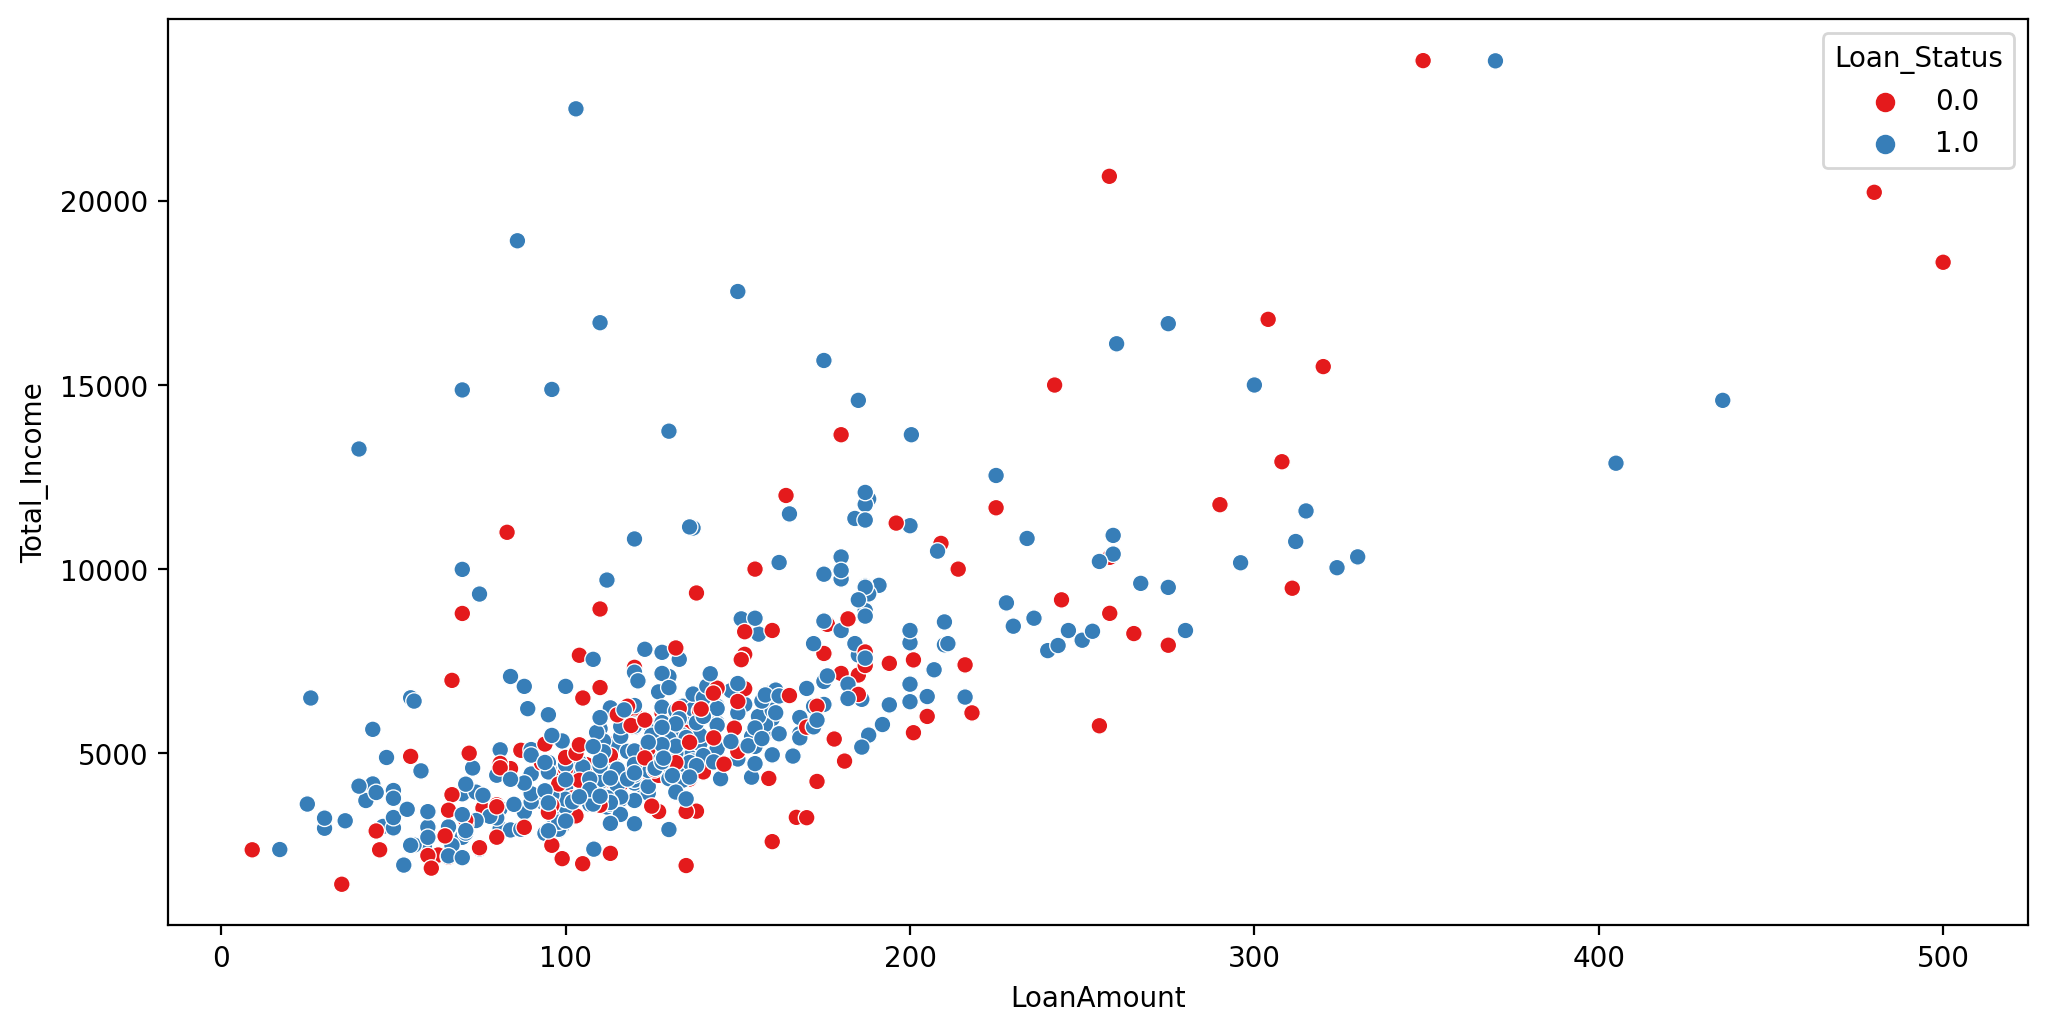

In [713]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=clean_data, x="LoanAmount", y=clean_data.Total_Income, hue="Loan_Status", palette="Set1")
plt.show()

In [72]:
Counter(clean_data.Loan_Status)

Counter({1.0: 382, 0.0: 161})

In [73]:
class_weight=Counter(clean_data.Loan_Status)[1]/Counter(clean_data.Loan_Status)[0]
class_weight

2.372670807453416

## Predictive modelling using different algorithms

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

In [76]:
X=clean_data.drop("Loan_Status", axis=1)
y=clean_data.Loan_Status

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [79]:
def model_train(model, parameters, x_train, y_train):
    bayes=BayesSearchCV(model, search_spaces=parameters, cv=5, scoring='f1')
    bayes.fit(x_train, y_train)
    return print(classification_report(y_train, bayes.predict(x_train)))

In [80]:
def model_test(model, parameters, x_train, y_train):
    bayes=BayesSearchCV(model, search_spaces=parameters, cv=5, scoring='f1')
    bayes.fit(x_train, y_train)
    return print(classification_report(y_test, bayes.predict(x_test)))

### Logistic regression

In [83]:
log_model=LogisticRegression(max_iter=10000, class_weight={1:class_weight, 0:1})
log_params={"C": Real(0,10)}

In [84]:
model_train(log_model, log_params, x_train, y_train)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



              precision    recall  f1-score   support

         0.0       0.77      0.24      0.37       125
         1.0       0.76      0.97      0.85       309

    accuracy                           0.76       434
   macro avg       0.76      0.61      0.61       434
weighted avg       0.76      0.76      0.71       434



In [85]:
model_test(log_model, log_params, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.73      0.31      0.43        36
         1.0       0.73      0.95      0.83        73

    accuracy                           0.73       109
   macro avg       0.73      0.63      0.63       109
weighted avg       0.73      0.73      0.70       109



### SVM Classifier

In [141]:
svm=SVC(class_weight='balanced', kernel='linear')
svm_params={'C': Real(0.1,10),
       'gamma': Categorical(['scale', 'auto'])
       }

In [147]:
model_train(svm, svm_params, x_train, y_train)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



              precision    recall  f1-score   support

         0.0       0.68      0.45      0.54       125
         1.0       0.80      0.92      0.86       309

    accuracy                           0.78       434
   macro avg       0.74      0.68      0.70       434
weighted avg       0.77      0.78      0.77       434



In [148]:
model_test(svm, svm_params, x_train, y_train)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.

              precision    recall  f1-score   support

         0.0       0.69      0.56      0.62        36
         1.0       0.80      0.88      0.84        73

    accuracy                           0.77       109
   macro avg       0.74      0.72      0.73       109
weighted avg       0.76      0.77      0.76       109



### Random Forest

In [95]:
random_forest=RandomForestClassifier(class_weight={0:1, 1:class_weight})

In [96]:
rfc_search = {
    'max_features': Categorical(['sqrt', 'log2', 'auto']),
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(2, 10)
}

In [97]:
model_train(random_forest, rfc_search, x_train, y_train)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default 

              precision    recall  f1-score   support

         0.0       1.00      0.66      0.80       125
         1.0       0.88      1.00      0.94       309

    accuracy                           0.90       434
   macro avg       0.94      0.83      0.87       434
weighted avg       0.91      0.90      0.90       434



In [98]:
model_test(random_forest, rfc_search, x_train, y_train)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default 

              precision    recall  f1-score   support

         0.0       0.75      0.50      0.60        36
         1.0       0.79      0.92      0.85        73

    accuracy                           0.78       109
   macro avg       0.77      0.71      0.72       109
weighted avg       0.78      0.78      0.77       109



c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



### AdaBoost Classifier

In [99]:
ada_model=AdaBoostClassifier()

In [100]:
ada_search = {
    'learning_rate': Real(0.01, 10),
    'n_estimators': Integer(100, 500),
#     'algorithm': Categorical(['SAMME', 'SAMME.R']) 
}

In [101]:
model_train(ada_model, ada_search, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.68      0.45      0.54       125
         1.0       0.80      0.92      0.86       309

    accuracy                           0.78       434
   macro avg       0.74      0.68      0.70       434
weighted avg       0.77      0.78      0.77       434



In [102]:
model_test(ada_model, ada_search, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.69      0.56      0.62        36
         1.0       0.80      0.88      0.84        73

    accuracy                           0.77       109
   macro avg       0.74      0.72      0.73       109
weighted avg       0.76      0.77      0.76       109



### XGBoost Classifier

In [103]:
xgb_model=XGBClassifier(scale_pos_weight=class_weight)

In [104]:
xgb_params = {
    'learning_rate': Real(0.01, 5),
    'n_estimators': Integer(1, 1000),
    'max_depth': Integer(3,10),
    'subsample': Real(0.5,1),
    'colsample_bytree': Real(0.5,1)
    
    }

In [105]:
model_train(xgb_model, xgb_params, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.39      0.20      0.26       125
         1.0       0.73      0.87      0.80       309

    accuracy                           0.68       434
   macro avg       0.56      0.54      0.53       434
weighted avg       0.63      0.68      0.64       434



In [106]:
model_test(xgb_model, xgb_params, x_train, y_train)

              precision    recall  f1-score   support

         0.0       0.46      0.31      0.37        36
         1.0       0.71      0.82      0.76        73

    accuracy                           0.65       109
   macro avg       0.58      0.56      0.56       109
weighted avg       0.62      0.65      0.63       109



### Model choosing

In [149]:
bayes=BayesSearchCV(ada_model, search_spaces=ada_search, cv=5, scoring='f1')
bayes.fit(x_train, y_train)

BayesSearchCV(cv=5, estimator=AdaBoostClassifier(), scoring='f1',
              search_spaces={'learning_rate': Real(low=0.01, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=500, prior='uniform', transform='normalize')})

In [150]:
pred=bayes.predict(x_test)
bayes.best_params_

OrderedDict([('learning_rate', 7.922313680509237), ('n_estimators', 334)])

In [151]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.69      0.56      0.62        36
         1.0       0.80      0.88      0.84        73

    accuracy                           0.77       109
   macro avg       0.74      0.72      0.73       109
weighted avg       0.76      0.77      0.76       109



In [153]:
pd.options.display.float_format = '{:.3f}'.format
log_features=pd.DataFrame(bayes.best_estimator_.feature_importances_, 
             columns=['Coefficients']).sort_values(by="Coefficients", ascending=False)
log_features["Features"]=X.columns
log_features

,Coefficients,Features
2,1.000,LoanAmount
0,0.000,Loan_Amount_Term
1,0.000,Credit_History
3,0.000,Total_Income
4,0.000,Gender_Male
5,0.000,Married_Yes
6,0.000,Dependents_1
7,0.000,Dependents_2
8,0.000,Dependents_3+
9,0.000,Education_Not Graduate


In [156]:
fig=px.bar(log_features, x='Features', y='Coefficients', 
           text=['{:.2f}'.format(val) for val in log_features['Coefficients']],
           title="Feature importance")
fig.show()